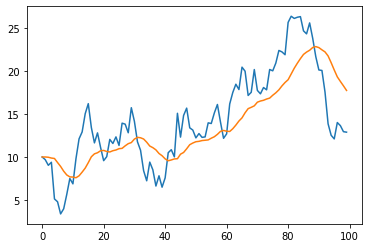

In [53]:
import numpy as np
import matplotlib.pyplot as plt

### EMA - regular interval ###
def ema(p, u):
    a = 0.1
    return a*p + (1 - a)*u

### Plot ###
N = 100

# initial price
p0 = 10

# volatility
v = 2
delta_prices = np.random.normal(0, v, N)

# prices
p = p0
prices = []
for dp in delta_prices:
    prices.append(p)
    p += dp

# moving averages
avgs = []
u = p0
for i in range(N):
    avgs.append(u)
    p = prices[i]
    u = ema(p, u)

plt.plot(prices)
plt.plot(avgs)
plt.show()

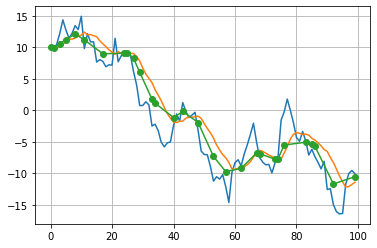

In [70]:
import math

# Curve V2 EMA
# b**x = e**(x*ln(b))
# (1/2)**x = e**(-x*ln(2))
def half_pow(x):
    return 0.5**(x/1e18) * 1e18

def ema_curve(p, u):
    dt = 2*600
    T = 600
    a = half_pow(dt/T*1e18)
    return (p*(1e18 - a) + u*a) / 1e18


### EMA - irregular interval ###
# half life
H = 4

# 1 - a_dt = 0.5**(dt/H)

# 0.5**(dt/H) = e**(c*dt)
# dt/H * ln(0.5) = c*dt
# c = ln(0.5)/H

# 1 - a_dt = e**(ln(0.5) / H * dt)

def ema(p, u, dt):
    a_dt = 1 - math.exp(math.log(0.5) / H * dt)
    return a_dt*p + (1 - a_dt)*u

### Plot ###
N = 100

# initial price
p0 = 10

# volatility
v = 2
delta_prices = np.random.normal(0, v, N)

# prices
p = p0
prices = []
for dp in delta_prices:
    prices.append(p)
    p += dp

# moving averages
# avgs[0] = regular interval
# avgs[1] = irregular interval
avgs = [[], []]

# regular interval
u = p0    
for t in range(N):
    avgs[0].append(u)
    p = prices[t]
    u = ema(p, u, 1)

# irregular interval
t = 0
ts = []
u = p0
while t < N:
    ts.append(t)
    avgs[1].append(u)

    dt = np.random.randint(1, 2*H)
    t += dt
    
    if t < N:
        p = prices[t]
        u = ema(p, u, dt)

plt.plot(prices)
plt.plot(avgs[0])
plt.plot(ts, avgs[1], marker="o")
plt.grid()
plt.show()